<a href="https://colab.research.google.com/github/mickeykim70/DL_scratch/blob/main/RGB_seperation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import os
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

# 프로젝트 기본 경로 설정
BASE_DIR = Path("/content/drive/MyDrive/deep-learning-from-scratch-master")
sys.path.append(str(BASE_DIR))

# 데이터셋 경로 설정
DATASET_DIR = BASE_DIR / 'dataset'

# 필요한 경우 경로가 존재하는지 확인
if not DATASET_DIR.exists():
    raise FileNotFoundError(f"Dataset directory not found at {DATASET_DIR}")


In [31]:
from ch07.simple_convnet import SimpleConvNet
from common.layers import Pooling

In [32]:
# 이미지 로드
img = imread(str(DATASET_DIR / 'lena.png'))

In [33]:
print(img.shape)

(256, 256, 3)


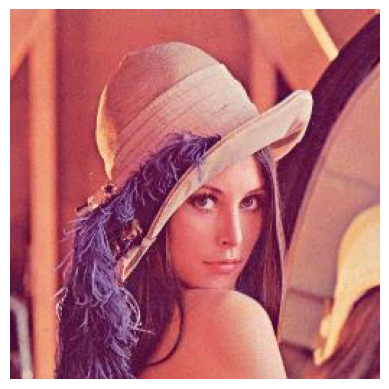

In [34]:
plt.imshow(img)
plt.axis('off')
plt.show()

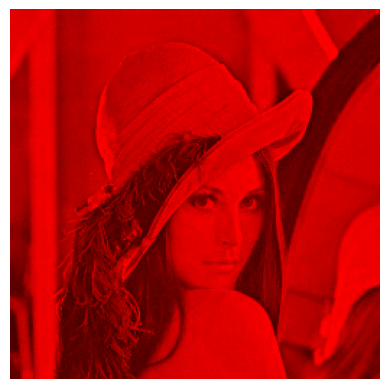

In [35]:
red = img.copy()
red[:,:,1] = 0
red[:,:,2] = 0
plt.imshow(red)
plt.axis('off')
plt.show()

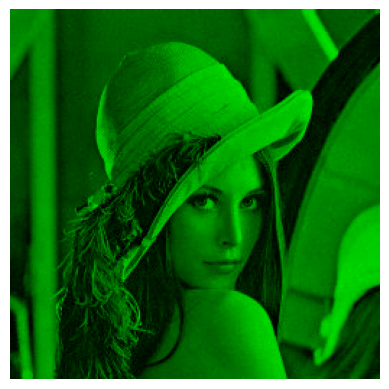

In [37]:
green = img.copy()
green[:,:,0] = 0
green[:,:,2] = 0
plt.imshow(green)
plt.axis('off')
plt.show()

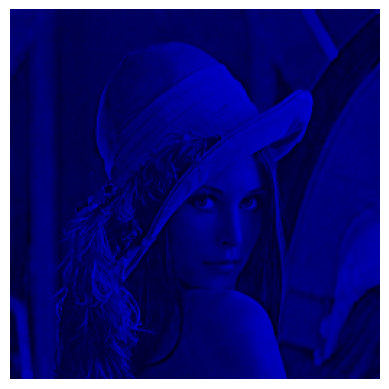

In [38]:
blue = img.copy()
blue[:,:,0] = 0
blue[:,:,1] = 0
plt.imshow(blue)
plt.axis('off')
plt.show()